#### Correlation: -1=negative correlation, 
  #### 0= no correlation
  #### +1= positive correlation

In [23]:
## Five degree of correlation: 1. strong -ve correlation, 2. moderate -ve
## 3. strong +ve correlation, 4. moderate +ve correlation, 5. no correlation

In [24]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
wea = pd.read_csv('C:/Users/SRTINNI/Desktop/CVD_vs_WEA/mar8tonov11.csv')
wea.head()
#wea.shape
#wea.columns
#wea.dtypes

,YEAR,MO,DY,T2M,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,WS10M_RANGE
0,2020,3,8,24.10,28.62,19.98,75.31,1.38,2.66
1,2020,3,9,23.30,28.36,18.56,63.12,0.00,2.89
2,2020,3,10,22.87,28.90,18.41,55.69,0.05,3.08
3,2020,3,11,23.77,29.25,17.81,58.50,0.00,1.94
4,2020,3,12,25.76,31.73,19.84,61.88,0.00,1.85


In [35]:
list(wea.columns)

['YEAR',
 'MO',
 'DY',
 'T2M',
 'T2M_MAX',
 'T2M_MIN',
 'RH2M',
 'PRECTOTCORR',
 'WS10M_RANGE']

In [36]:
wea.rename(columns={'T2M': 'Avg. Temp.(°C)', 'T2M_MAX': "Max. Temp.(°C)",
                    'T2M_MIN': 'Min. Temp.(°C)', 'RH2M': 'Avg. Humidity(%)', 
                    'WS10M_RANGE': 'Avg. Wind-flow(m/s)'}, inplace=True)
wea.head()

,YEAR,MO,DY,Avg. Temp.(°C),Max. Temp.(°C),Min. Temp.(°C),Avg. Humidity(%),PRECTOTCORR,Avg. Wind-flow(m/s)
0,2020,3,8,24.10,28.62,19.98,75.31,1.38,2.66
1,2020,3,9,23.30,28.36,18.56,63.12,0.00,2.89
2,2020,3,10,22.87,28.90,18.41,55.69,0.05,3.08
3,2020,3,11,23.77,29.25,17.81,58.50,0.00,1.94
4,2020,3,12,25.76,31.73,19.84,61.88,0.00,1.85


In [37]:
cvd = pd.read_csv('C:/Users/SRTINNI/Desktop/CVD_vs_WEA/covid_corr.csv')
cvd= cvd.dropna()
#cvd.head()
cvd.shape

(614, 2)

#### Temp vs Daily new cases

#### Correlation using numpy

In [49]:
np.corrcoef(wea['Min. Temp.(°C)'],cvd['Daily new cases'])

array([[1.        , 0.36543318],
       [0.36543318, 1.        ]])

#### Correletion using scipy

In [50]:
st.pearsonr(wea['Avg. Temp.(°C)'],cvd['Daily new cases'])

(0.3031535160812141, 1.6165887027242356e-14)

Text(0.5, 1.0, 'Min. Temp.(°C) vs. Daily new cases, Corr. coef=0.36')

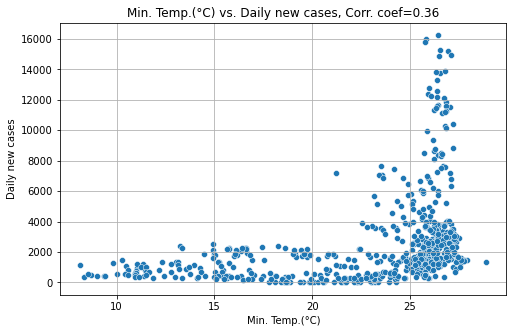

In [51]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore") 
plt.figure(figsize=(8,5))
plt.grid()
ax = sns.scatterplot(wea['Min. Temp.(°C)'],cvd['Daily new cases'])
ax.set_title("Min. Temp.(°C) vs. Daily new cases, Corr. coef=0.36")

In [41]:
#sns.lmplot(x="Avg. Temp", y="Daily new cases", data=wea);

### humidity vs Daily new cases

In [42]:
np.corrcoef(wea['Avg. Humidity(%)'],cvd['Daily new cases'])

array([[1.        , 0.22484434],
       [0.22484434, 1.        ]])

In [43]:
st.pearsonr(wea['Avg. Humidity(%)'],cvd['Daily new cases'])

(0.22484433611100832, 1.7777602139392683e-08)

Text(0.5, 1.0, 'Average humidity(%) vs. Daily new cases. Corr. Coef=0.22')

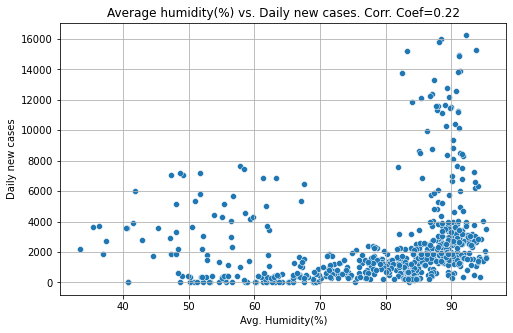

In [46]:
plt.figure(figsize=(8,5))
plt.grid()
ax = sns.scatterplot(wea['Avg. Humidity(%)'],cvd['Daily new cases'])
ax.set_title("Average humidity(%) vs. Daily new cases. Corr. Coef=0.22")

#### wind flow vs Daily new cases

In [47]:
np.corrcoef(wea['Avg. Wind-flow(m/s)'],cvd['Daily new cases'])

array([[1.        , 0.22101986],
       [0.22101986, 1.        ]])

Text(0.5, 1.0, 'Avg. Windflow(m/s) vs. Daily new cases.Corr. Coef=0.2210')

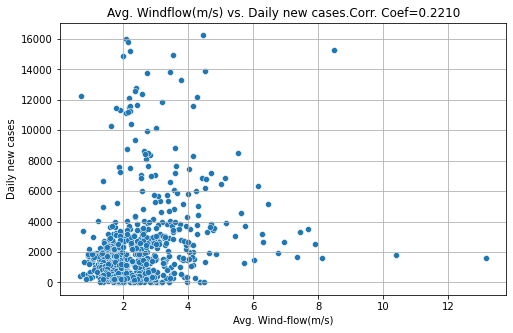

In [48]:
plt.figure(figsize=(8,5))
plt.grid()
ax = sns.scatterplot(wea['Avg. Wind-flow(m/s)'],cvd['Daily new cases'])
ax.set_title("Avg. Windflow(m/s) vs. Daily new cases.Corr. Coef=0.2210")

In [ ]:
#http://seaborn.pydata.org/introduction.html#:~:text=Seaborn%20is%20a%20library%20for,explore%20and%20understand%20your%20data.